In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seawater
import xarray as xr
import scipy.signal as sp
import pandas as pd
import math

%matplotlib inline

## Slope of something (sound speed profile below SLD)
Identifies the sound speed slope that **does not change by more than 0.1 s** between successive slope calculations. 

>*This is supposed to demonstrate the **gradient of sound speed** immediately below the SLD (Sonic Layer Depth) and above the Critical Depth. This has implications as to how much sound would be trapped in the above layer.*

This notebook will contain Ocean Navigator's proof of concept python code to calculate the variable - Slope of Sound Speed Profile (SSP) below SLD

### Importing a Sample Sound Speed Profile

In [8]:
profile = pd.read_csv("sample-sound-speed-profiles/ts_giops_day_2021-01-22T17_20_15.578175_POSITIVE.csv", header=2)
profile

,Latitude,Longitude,Depth (m),Pressure,Salinity,Temperature,Sound Speed
0,44.8264,-56.6095,0.5,0.5,31.4,4.1,1462.6
1,44.8264,-56.6095,1.5,1.6,31.4,4.1,1462.6
2,44.8264,-56.6095,2.6,2.7,31.4,4.1,1462.6
3,44.8264,-56.6095,3.8,3.8,31.4,4.1,1462.6
4,44.8264,-56.6095,5.1,5.1,31.4,4.1,1462.7
5,44.8264,-56.6095,6.4,6.5,31.4,4.1,1462.7
6,44.8264,-56.6095,7.9,8.0,31.4,4.1,1462.7
7,44.8264,-56.6095,9.6,9.7,31.4,4.1,1462.7
8,44.8264,-56.6095,11.4,11.5,31.4,4.1,1462.8
9,44.8264,-56.6095,13.5,13.6,31.4,4.1,1462.8


- Taking out the sound speed and depth from the profile

In [9]:
profile_depth_sspeed = profile[['Sound Speed', 'Depth (m)']] # extracting only the soundspeed and depth column
profile_depth_sspeed

,Sound Speed,Depth (m)
0,1462.6,0.5
1,1462.6,1.5
2,1462.6,2.6
3,1462.6,3.8
4,1462.7,5.1
5,1462.7,6.4
6,1462.7,7.9
7,1462.7,9.6
8,1462.8,11.4
9,1462.8,13.5


- Visualizing the profile in a depth vs sound speed plot

Text(0.5, 0, 'Speed of sound [m/s]')

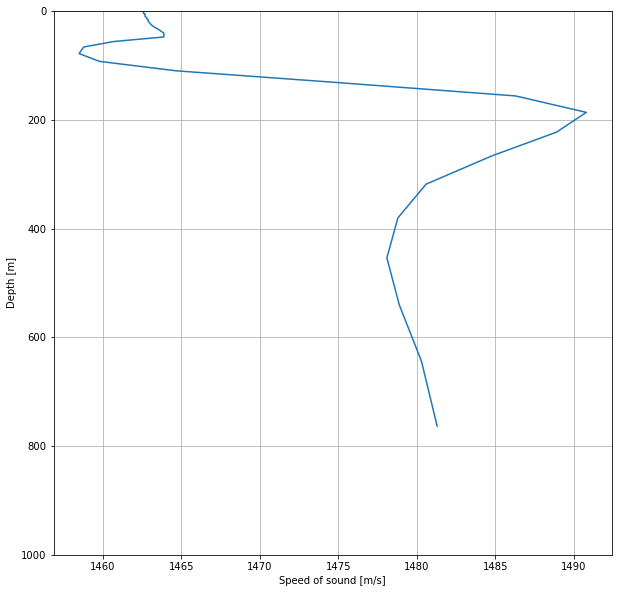

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(profile_depth_sspeed['Sound Speed'], profile_depth_sspeed['Depth (m)'])
ax.grid(True)
ax.set_ylim([1000,0])
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Speed of sound [m/s]')

- Using the find_peaks() function from scipy.signal to detect the local minima and local maxima

In [12]:
profile_np = np.array(profile_depth_sspeed['Sound Speed'])
local_minima = sp.find_peaks(-profile_np) # get the index array of local minima
local_minima =local_minima[0]
local_maxima = sp.find_peaks(profile_np) # get the index array of the local maxima
local_maxima = local_maxima[0]

- Visualizing the minima and maxima in plot

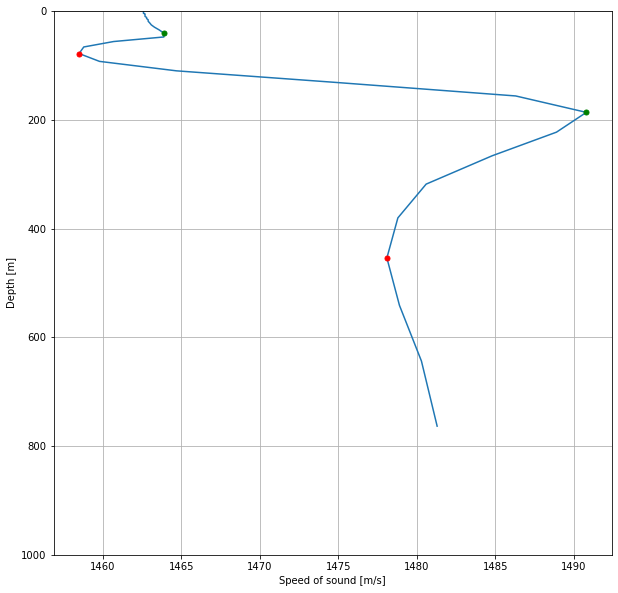

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(profile_depth_sspeed['Sound Speed'], profile_depth_sspeed['Depth (m)'])
ax.grid(True)
ax.set_ylim([1000,0])
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Speed of sound [m/s]')
ax.plot(profile_depth_sspeed['Sound Speed'][local_minima],profile_depth_sspeed['Depth (m)'][local_minima],'r.',markersize=10)
ax.plot(profile_depth_sspeed['Sound Speed'][local_maxima],profile_depth_sspeed['Depth (m)'][local_maxima],'g.',markersize=10)

- Determining p1, p2 and p3 for the sound speed profile (p1 = Sonic Layer Depth, p2 = depth of maximum sspeed between SLD and Critical depth & p3 = Critical depth. 
> **Need to look into the current code in *functions.py* file and discuss with team to see, if instead of determining this point from the local extrema list, can we use the existing functions that calculates the SLD and critical depth**

In [20]:
sound_speed = profile_depth_sspeed['Sound Speed']
depth = profile_depth_sspeed['Depth (m)']
if len(local_minima)>=2: #if there are 2 or more minima
    p1 = 0 # surface
    p2 = local_minima[0] #first minimum
    if len(local_maxima)>=2: # if there are more than one maxima
        p1 = local_maxima[0] #first maximum
        p3 = local_maxima[1] #second maximum
    else: #only one local maximum
        p3 =  local_maxima[0] 
print("p1 p2 p3 : " +str(p1)+" "+str(p2)+" "+str(p3))
print("Depth at p1 p2 p3 : " +str(depth[p1])+"m "+str(depth[p2])+"m "+str(depth[p3])+"m")


p1 p2 p3 : 16 20 25
Depth at p1 p2 p3 : 40.3m 77.9m 186.1m
